Accuracy: 0.52


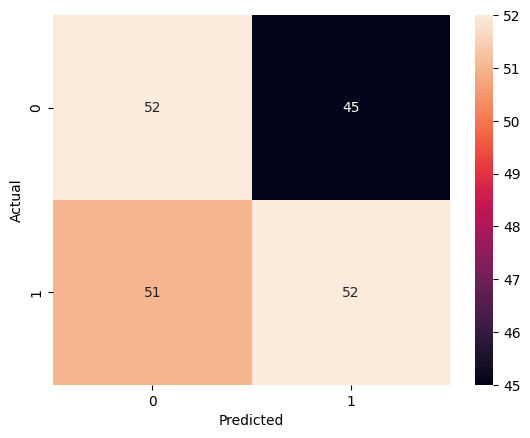

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

df = pd.read_csv("/Users/yeomsangyoon/Visual Studio/0_tensor/source/Raisin_Dataset.csv", index_col=0)

# Generate a sample Raisin dataset (replace this with your actual dataset)
np.random.seed(0)
num_samples = 1000

# Features: sweetness, size, color, surface texture
sweetness = np.random.uniform(0, 10, num_samples)
size = np.random.uniform(0, 20, num_samples)
color = np.random.choice(['red', 'green', 'blue'], num_samples)
surface_texture = np.random.choice(['smooth', 'wrinkled'], num_samples)

# Target: isRaisin (binary classification)
is_raisin = np.random.choice([0, 1], num_samples)

# Create DataFrame
df = pd.DataFrame({
    'sweetness': sweetness,
    'size': size,
    'color': color,
    'surface_texture': surface_texture,
    'is_raisin': is_raisin
})

# Convert categorical columns to numeric using LabelEncoder
le_color = LabelEncoder()
le_surface_texture = LabelEncoder()
df['color'] = le_color.fit_transform(df['color'])
df['surface_texture'] = le_surface_texture.fit_transform(df['surface_texture'])

# Splitting the dataset into the Training set and Test set
X = df.drop('is_raisin', axis=1)
y = df['is_raisin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the classifier to the Training set
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)

# Evaluating the classifier
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()